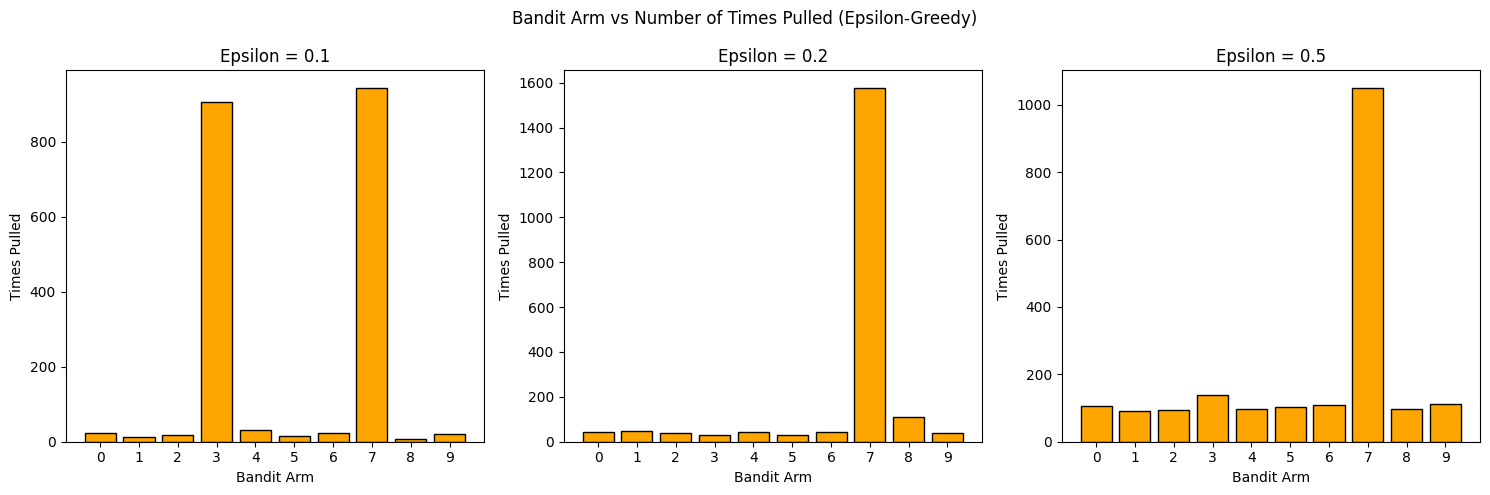

In [8]:
import numpy as np
import matplotlib.pyplot as plt


class MultiArmedBandit:
    def __init__(self, k, means, std_devs):
        self.k = k
        self.means = means
        self.std_devs = std_devs

    def pull(self, arm):
        return np.random.normal(self.means[arm], self.std_devs[arm])


class EpsilonGreedy:
    def __init__(self, epsilon, k):
        self.epsilon = epsilon
        self.k = k
        self.q_values = np.zeros(k)
        self.arm_counts = np.zeros(k)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        return np.argmax(self.q_values)

    def update(self, arm, reward):
        self.arm_counts[arm] += 1
        self.q_values[arm] += (
            reward - self.q_values[arm]
        ) / self.arm_counts[arm]


def simulate_bandit(bandit, strategy, n_steps):
    for _ in range(n_steps):
        arm = strategy.select_arm()
        reward = bandit.pull(arm)
        strategy.update(arm, reward)

    return strategy.arm_counts


def plot_arm_pull_counts_all_eps(arm_counts_list, epsilons):
    arms = np.arange(len(arm_counts_list[0]))

    plt.figure(figsize=(15, 5))

    for i, (arm_counts, epsilon) in enumerate(zip(arm_counts_list, epsilons)):
        plt.subplot(1, 3, i + 1)
        plt.bar(arms, arm_counts, color="orange", edgecolor="black")
        plt.xlabel("Bandit Arm")
        plt.ylabel("Times Pulled")
        plt.title(f"Epsilon = {epsilon}")
        plt.xticks(arms)

    plt.suptitle("Bandit Arm vs Number of Times Pulled (Epsilon-Greedy)")
    plt.tight_layout()
    plt.show()


# -------- MAIN EXECUTION --------
if __name__ == "__main__":
    k = 10
    means = np.random.normal(0, 1, k)
    std_devs = np.ones(k)

    bandit = MultiArmedBandit(k, means, std_devs)

    epsilons = [0.1, 0.2, 0.5]
    n_steps = 2000

    arm_counts_list = []

    for epsilon in epsilons:
        strategy = EpsilonGreedy(epsilon, k)
        arm_counts = simulate_bandit(bandit, strategy, n_steps)
        arm_counts_list.append(arm_counts)

    plot_arm_pull_counts_all_eps(arm_counts_list, epsilons)
